In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from PIL import ImageFile
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Exploration

In [ ]:
#cek folder
main_directory = "/content/drive/MyDrive/Bangkit/faceshape-preprocess/dataset/"
os.listdir(main_directory)

['test', 'train', 'val']

In [ ]:
class_ = os.listdir(os.path.join(main_directory, "test"))

In [ ]:
os.listdir(os.path.join(main_directory, "test"))

['Heart', 'Oval', 'Round', 'Square']

In [ ]:
print("Test files")
files_num_test = []
files_num_val = []
files_num_train = []

for i in range (len(class_)):
    files_num_test.append(len(os.listdir(os.path.join(main_directory,"test/",class_[i]))))
    print(f"Number of files from class {class_[i]} is {files_num_test[i]}")

print("\nVal files")
for i in range (len(class_)):
    files_num_val.append(len(os.listdir(os.path.join(main_directory,"val/",class_[i]))))
    print(f"Number of files from class {class_[i]} is {files_num_val[i]}")

print("\nTrain files")
for i in range (len(class_)):
    files_num_train.append(len(os.listdir(os.path.join(main_directory,"train/",class_[i]))))
    print(f"Number of files from class {class_[i]} is {files_num_train[i]}")

Test files
Number of files from class Heart is 100
Number of files from class Oval is 99
Number of files from class Round is 99
Number of files from class Square is 100

Val files
Number of files from class Heart is 200
Number of files from class Oval is 200
Number of files from class Round is 200
Number of files from class Square is 200

Train files
Number of files from class Heart is 698
Number of files from class Oval is 697
Number of files from class Round is 689
Number of files from class Square is 699


<function matplotlib.pyplot.show(close=None, block=None)>

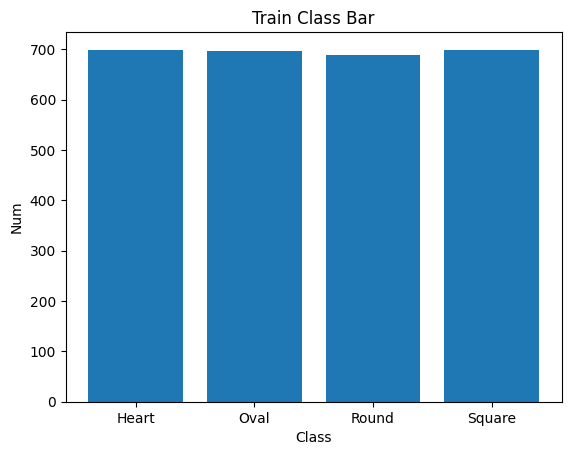

In [ ]:
import matplotlib.pyplot as plt
plt.bar(class_,files_num_train)
plt.xlabel('Class')
plt.ylabel('Num')
plt.title('Train Class Bar')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

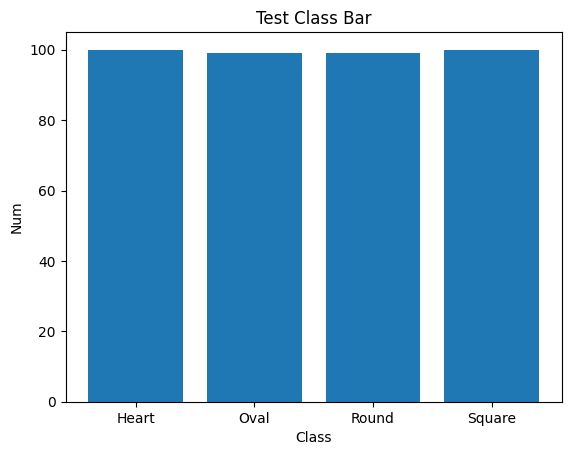

In [ ]:
import matplotlib.pyplot as plt
plt.bar(class_,files_num_test)
plt.xlabel('Class')
plt.ylabel('Num')
plt.title('Test Class Bar')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

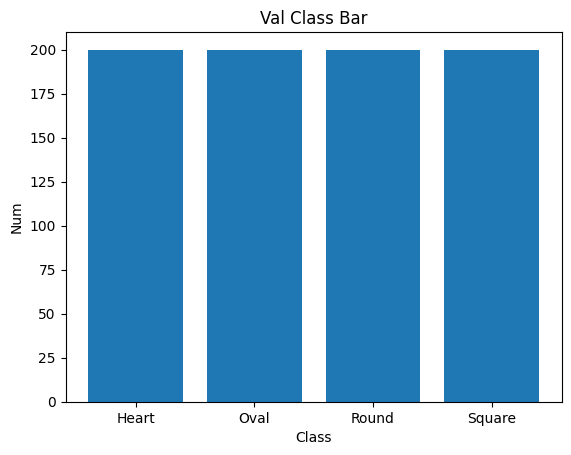

In [ ]:
import matplotlib.pyplot as plt
plt.bar(class_,files_num_val)
plt.xlabel('Class')
plt.ylabel('Num')
plt.title('Val Class Bar')

plt.show

In [ ]:
train_data = main_directory+"train"
val_data = main_directory+"val"
test_data = main_directory+"test"

<ipython-input-11-778e6157d1f0>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


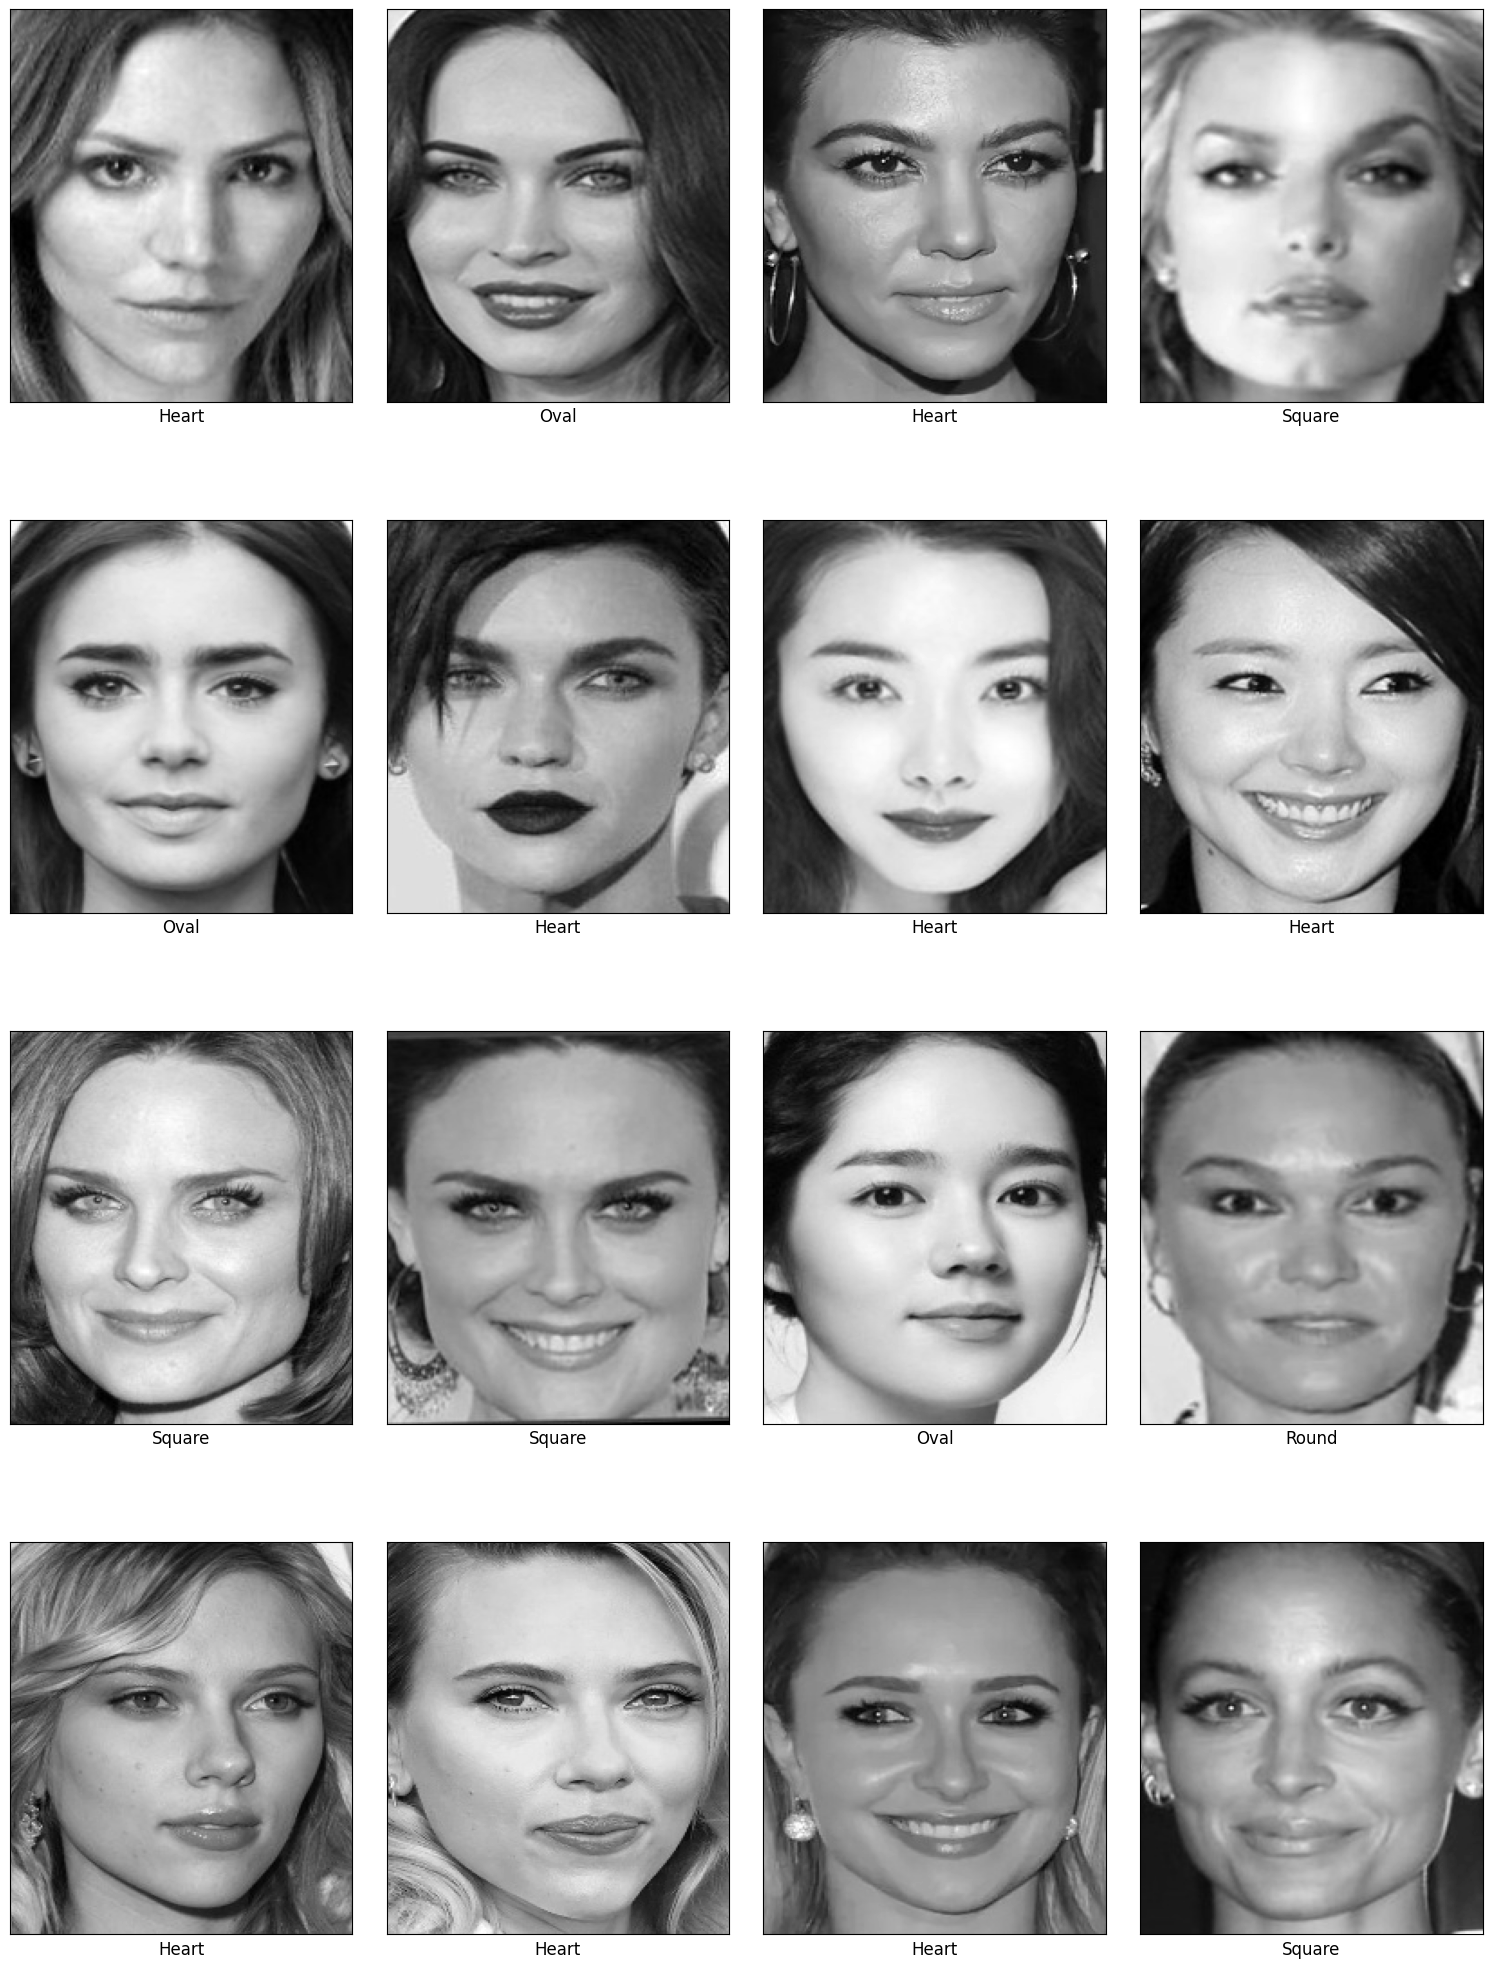

In [ ]:
import random
import matplotlib.image as mpimg
from matplotlib import gridspec

# Set up the grid for images
num_rows = 4
num_cols = 4
fig = plt.figure(figsize=(19, 25))
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.1, hspace=0.3)

for i in range(num_rows):
    for j in range(num_cols):
        # Randomly select a class
        random_class = random.choice(class_)

        # Path to the randomly selected class folder
        random_class_folder = os.path.join(train_data, random_class)

        # Get the list of images in the randomly selected class folder
        images = os.listdir(random_class_folder)

        # Randomly select an image from the class
        random_image = random.choice(images)

        # Path to the randomly selected image
        random_image_path = os.path.join(random_class_folder, random_image)

        # Load the randomly selected grayscale image
        img = mpimg.imread(random_image_path)

        # Display the image in the grid
        ax = plt.subplot(gs[i, j])
        ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('auto')

        # Display the class label below the image
        ax.set_xlabel(random_class, fontsize=12)

plt.tight_layout()
plt.show()

### Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(
                                    rescale = 1./255,
                                    horizontal_flip = True,
                                    brightness_range=(0.8, 1.2),

                                    )
val_datagen = ImageDataGenerator(
                                    rescale = 1./255,
                                    brightness_range=(0.8, 1.2),

                                    )

test_datagen = ImageDataGenerator(
                                rescale = 1./255,
                                brightness_range = (0.8,1.2),

                                )

In [ ]:

train_set = train_datagen.flow_from_directory ( train_data,
                                               target_size = (250,190),
                                               batch_size = 64,
                                               #color_mode = 'grayscale',
                                               shuffle = True,
                                               class_mode = 'categorical'
                                                )

val_set = train_datagen.flow_from_directory ( val_data,
                                               target_size = (250,190),
                                               batch_size = 64,
                                               #color_mode = 'grayscale',
                                               shuffle = True,
                                               class_mode = 'categorical'
                                                )

test_set = train_datagen.flow_from_directory ( os.path.join(main_directory,"test"),
                                               target_size = (250,190),
                                               batch_size = 64,
                                               #color_mode = 'grayscale',
                                               shuffle = True,
                                               class_mode = 'categorical'
                                                )


Found 2783 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 398 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, InceptionResNetV2, MobileNet, Xception, DenseNet201, EfficientNetB0
input_shape=(250,190,3)
def get_pretrained_model(model_name, input_shape, num_classes):
    if model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(250,190,3))
    elif model_name == 'VGG19':
        base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'InceptionResNetV2':
        base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'MobileNet':
        base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'Xception':
        base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'DenseNet201':
        base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
    elif model_name == 'EfficientNetB0':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError('Invalid model name. Supported models: VGG16, VGG19, ResNet50, InceptionV3, InceptionResNetV2, MobileNet, Xception, DenseNet201, EfficientNetB0')

    model = tf.keras.models.Sequential()
    model.add(base_model)
    model.add(tf.keras.layers.MaxPooling2D(3,3))
    model.add(tf.keras.layers.Dropout(0.2))
    #model.add(tf.keras.layers.Flatten())
    #model,add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    return model

model = get_pretrained_model('InceptionV3', (250, 190, 3), num_classes=4)
model.summary()


# Compile and train the model as needed


87910968/87910968 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 4, 2048)        21802784  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 1, 2048)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 2, 1, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 4)                 16388     
                                                                 
Total params: 21819172 (83.23 MB)
Trainable params: 21784

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist = model.fit(train_set, epochs=50, validation_data=val_set)

Epoch 1/50
44/44 [==============================] - 1448s 32s/step - loss: 1.6662 - accuracy: 0.3360 - val_loss: 1.8553 - val_accuracy: 0.3013
Epoch 2/50
44/44 [==============================] - 28s 630ms/step - loss: 1.1560 - accuracy: 0.5300 - val_loss: 1.6215 - val_accuracy: 0.4025
Epoch 3/50
44/44 [==============================] - 27s 598ms/step - loss: 0.7577 - accuracy: 0.7061 - val_loss: 1.1554 - val_accuracy: 0.5238
Epoch 4/50
44/44 [==============================] - 27s 619ms/step - loss: 0.4582 - accuracy: 0.8286 - val_loss: 1.2778 - val_accuracy: 0.5225
Epoch 5/50
44/44 [==============================] - 27s 599ms/step - loss: 0.2723 - accuracy: 0.9001 - val_loss: 0.8873 - val_accuracy: 0.6913
Epoch 6/50
44/44 [==============================] - 27s 599ms/step - loss: 0.1875 - accuracy: 0.9371 - val_loss: 0.9389 - val_accuracy: 0.6775
Epoch 7/50
44/44 [==============================] - 28s 630ms/step - loss: 0.1255 - accuracy: 0.9590 - val_loss: 0.8334 - val_accuracy: 0.7287

In [ ]:
model.save('/content/drive/MyDrive/Bangkit/faceshape-preprocess/model/inceptionV3.h5')
model.save('/content/drive/MyDrive/Bangkit/faceshape-preprocess/model/inceptionV3.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
yhat = model.predict(test_set)
#print (f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

8/8 [==============================] - 5s 589ms/step


In [ ]:
yhat

In [ ]:
# Dapetin index nilai tertinggi di setiap baris
import numpy as np

predicted_labels = np.argmax(yhat, axis=1)
class_names = ['Heart',  'Oval', 'Round', 'Square']

predicted_class_names = [class_names[i] for i in predicted_labels]


16/16 [==============================] - 5s 135ms/step
Accuracy: 76.71%


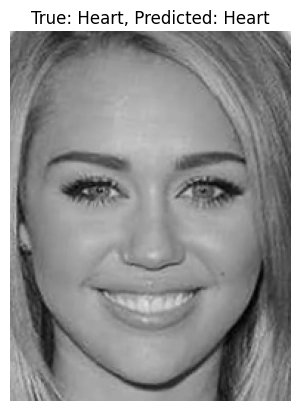

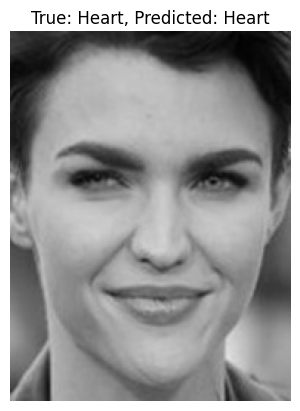

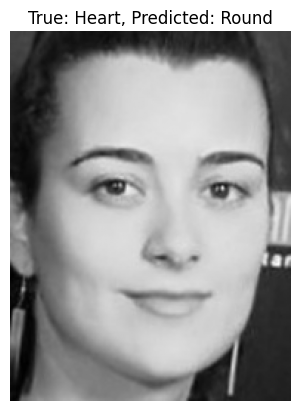

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
#model = load_model('path_to_your_trained_model.h5')

# Path to test dataset directory
test_dir = '/content/drive/MyDrive/Bangkit/faceshape-preprocess/dataset/test'

# Get class names from folder names
class_names = sorted(os.listdir(test_dir))

# Load test images and labels
test_images = []
true_labels = []

for i, class_name in enumerate(class_names):
    class_path = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        #image = cv2.resize(image, (224, 224))  # Resize if needed
        test_images.append(image)
        true_labels.append(i)  # Assign label index

# Convert to numpy arrays
test_images = np.array(test_images)
true_labels = np.array(true_labels)

# Normalize images
test_images = test_images / 255.0

# Predict classes for test images
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display some test images with true and predicted labels
import matplotlib.pyplot as plt

num_images_to_display = 3
for i in range(num_images_to_display):
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[true_labels[i]]}, Predicted: {class_names[predicted_labels[i]]}")
    plt.axis('off')
    plt.show()


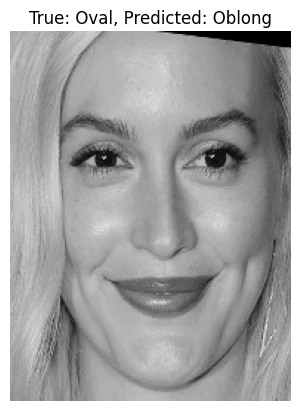

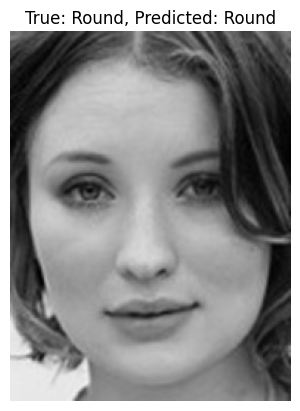

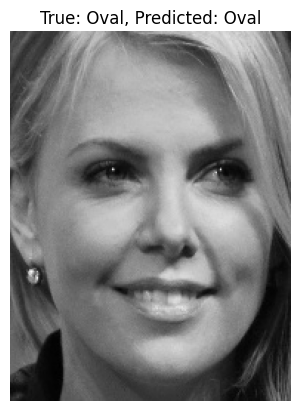

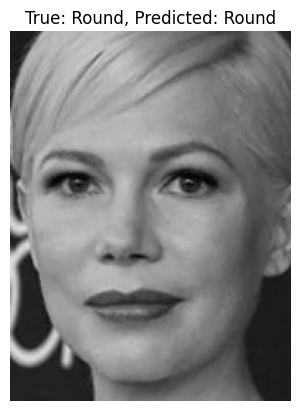

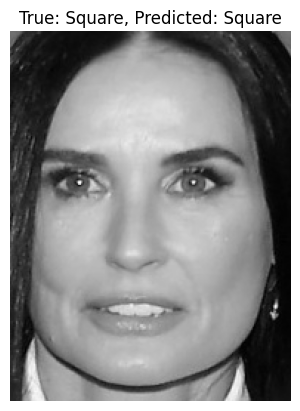

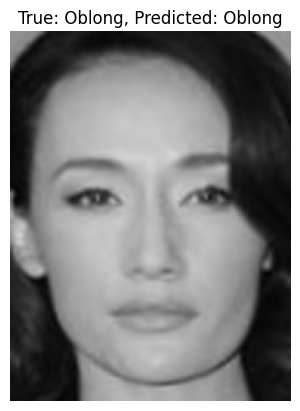

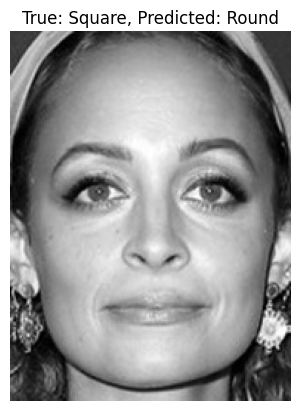

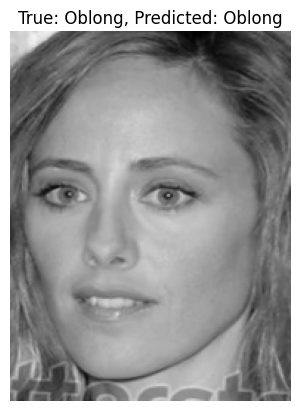

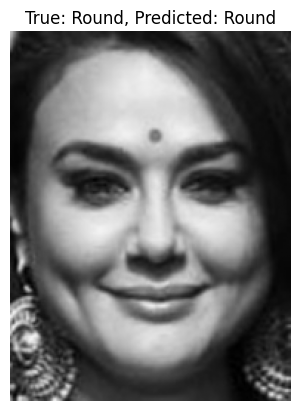

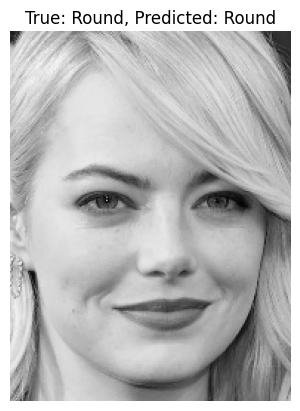

In [ ]:
# Shuffle test images and labels
indices = np.arange(len(test_images))
np.random.shuffle(indices)

shuffled_test_images = test_images[indices]
shuffled_true_labels = true_labels[indices]

# Display some shuffled test images with true and predicted labels
num_images_to_display = 10

for i in range(num_images_to_display):
    plt.imshow(shuffled_test_images[i])
    plt.title(f"True: {class_names[shuffled_true_labels[i]]}, Predicted: {class_names[predicted_labels[indices[i]]]}")
    plt.axis('off')
    plt.show()


In [ ]:

img=cv2.imread('/content/3b1404dabe8a3897358832181616d23f.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(250,190))
test_set = model.predict(np.expand_dims(resize/255,0))

print(test_set)
predicted_labels = np.argmax(test_set, axis=1)
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']

predicted_class_names = [class_names[i] for i in predicted_labels]
print(predicted_class_names)

In [ ]:

img=cv2.imread('/content/how-to-choose-right-haircut-for-face-shapes-men-oblong-side-parted-500x750.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#resize=tf.image.resize(img,(250,190,1))
test_set = model.predict(np.expand_dims(resize/255,0))

print(test_set)
predicted_labels = np.argmax(test_set, axis=1)

predicted_class_names = [class_names[i] for i in predicted_labels]
print(predicted_class_names)

In [ ]:

img=cv2.imread('/content/40-Best-Haircuts-For-Square-Face-Male-Stylish-Square-Face-Haircuts-Textured-Messy-Hair-Top.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(250,190))
test_set = model.predict(np.expand_dims(resize/255,0))

print(test_set)
predicted_labels = np.argmax(test_set, axis=1)

predicted_class_names = [class_names[i] for i in predicted_labels]
print(predicted_class_names)

In [ ]:
#normal
img=cv2.imread('/content/nyoba.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(250,190))
test_set = model.predict(np.expand_dims(resize/255,0))

print(test_set)
predicted_labels = np.argmax(test_set, axis=1)

predicted_class_names = [class_names[i] for i in predicted_labels]
print(predicted_class_names)

In [ ]:
#normal
img=cv2.imread('/content/intan.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize=tf.image.resize(img,(250,190))
test_set = model.predict(np.expand_dims(resize/255,0))

print(test_set)
predicted_labels = np.argmax(test_set, axis=1)

predicted_class_names = [class_names[i] for i in predicted_labels]
print(predicted_class_names)